In [1]:
import pandas as pd
import nablachem.alchemy
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("output.csv")

In [26]:
df = df.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [4]:
df

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,...,hess[110][101],hess[110][102],hess[110][103],hess[110][104],hess[110][105],hess[110][106],hess[110][107],hess[110][108],hess[110][109],hess[110][110]
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004612,1.460848e-08,-4.989482e-08,-0.000447,-2.869488e-08,1.192944e-08,0.003351,3.288611e-09,-9.029891e-07,0.090576
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002010,6.109221e-09,3.230895e-08,-0.004575,4.016259e-08,3.270608e-09,0.002196,3.509304e-07,-7.301644e-07,0.093377
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004587,-3.109972e-10,1.645304e-09,-0.000508,-3.122193e-08,-5.326334e-09,0.004587,5.512057e-09,-9.844535e-07,0.088905
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001682,1.182707e-08,-3.765515e-08,0.001854,-7.793978e-09,-2.037269e-08,0.004139,2.316809e-09,-1.116762e-06,0.016178
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.003945,-5.356160e-09,-1.931375e-08,0.001096,2.242576e-08,-1.221837e-08,0.003945,8.911984e-10,-9.763140e-07,0.087532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.004493,2.172942e-08,5.667942e-09,0.000685,-3.418302e-08,-3.623716e-09,0.003777,-9.843208e-09,-9.845170e-07,0.090814
111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004813,1.767993e-08,7.912118e-09,-0.001119,-2.096480e-08,2.577847e-08,0.002865,1.362232e-07,-9.602859e-07,0.083529
112,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004157,1.114899e-08,-1.591869e-08,0.000847,-1.436836e-08,-9.294923e-09,0.003693,7.734467e-09,-9.812529e-07,0.090602
113,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001756,2.100714e-09,-5.086489e-08,0.001432,1.236412e-08,-3.583088e-09,0.003787,8.139841e-09,-9.241712e-07,0.085534


In [5]:
column_tuple = tuple(df.columns)

In [7]:
# Assuming 'Energy', 'HOMO', 'LUMO' are outputs specified when initializing MultiTaylor
mt = nablachem.alchemy.MultiTaylor(df, outputs=column_tuple[20:])

# Set the center using ONLY input columns (z0-z19)
mt.reset_center(
    z0=0, z1=0, z2=0, z3=0,
    z4=0, z5=0, z6=0, z7=0,
    z8=0, z9=0, z10=0, z11=0,
    z12=0, z13=0, z14=0, z15=0,
    z16=0, z17=0, z18=0, z19=0
)
mt.build_model(1)

In [8]:
modelE=[]
trueE=[]
modelH=[]
trueH=[]
modelL=[]
trueL=[]
for n in range(len(df)):
    result = mt.query(
        z0=df['z0'][n], z1=df['z1'][n], z2=df['z2'][n], z3=df['z3'][n],
        z4=df['z4'][n], z5=df['z5'][n], z6=df['z6'][n], z7=df['z7'][n],
        z8=df['z8'][n], z9=df['z9'][n], z10=df['z10'][n], z11=df['z11'][n],
        z12=df['z12'][n], z13=df['z13'][n], z14=df['z14'][n], z15=df['z15'][n],
        z16=df['z16'][n], z17=df['z17'][n], z18=df['z18'][n], z19=df['z19'][n]
    )
    modelE.append(result["Energy"])  # Remove [n] here
    trueE.append(df['Energy'][n])    # Directly access the nth row's 'Energy' value  
    modelH.append(result["HOMO"])  # Remove [n] here
    trueH.append(df['HOMO'][n])    # Directly access the nth row's 'Energy' value  
    modelL.append(result["LUMO"])  # Remove [n] here
    trueL.append(df['LUMO'][n])    # Directly access the nth row's 'Energy' value  



In [33]:
for n in range(len(modelE)):
    if modelE[n]-trueE[n] < -10:
        df2 = pd.read_csv("output.csv")
        print(f' OUTLIER: {df2['Unnamed: 0'][n]}')

 OUTLIER: index_434_carga_0.out
 OUTLIER: index_453_carga_0.out


## Energy Plot

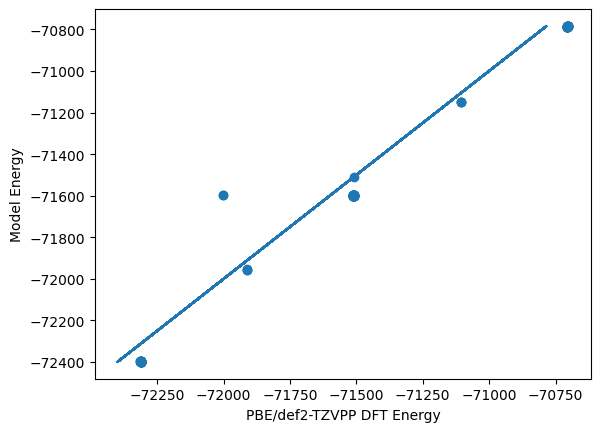

In [10]:
plt.scatter(modelE, trueE)
plt.ylabel('Model Energy')
plt.xlabel('PBE/def2-TZVPP DFT Energy')
plt.plot(trueE, trueE)
plt.show()

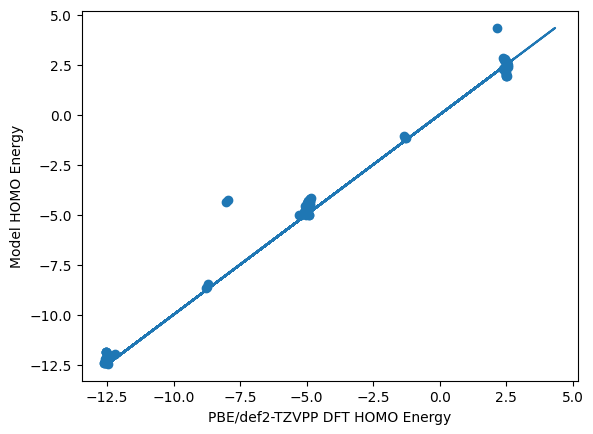

In [11]:
plt.scatter(modelH, trueH)
plt.ylabel('Model HOMO Energy')
plt.xlabel('PBE/def2-TZVPP DFT HOMO Energy')
plt.plot(trueH, trueH)
plt.show()

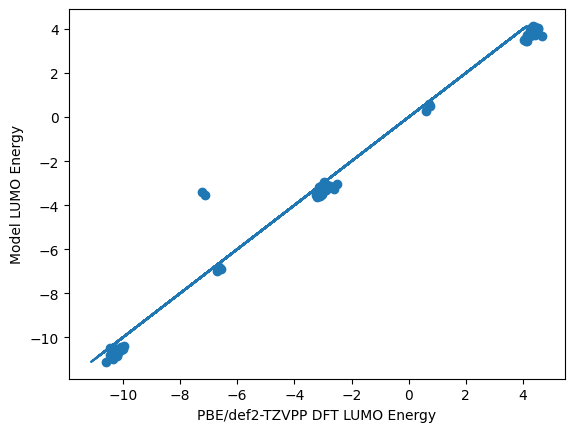

In [12]:
plt.scatter(modelL, trueL)
plt.ylabel('Model LUMO Energy')
plt.xlabel('PBE/def2-TZVPP DFT LUMO Energy')
plt.plot(trueL, trueL)
plt.show()